# Import Libraries

In [1]:
import statistics
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from scipy import stats
from numpy import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


# Load the Dataset

In [2]:
df = pd.read_csv(r"D:\Mentorness\Task_1\goldstock.csv")

In [3]:
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


# Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2511 non-null   object 
 2   Close       2511 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB


In [5]:
df.shape

(2511, 7)

In [6]:
df.describe()

,Unnamed: 0,Close,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1260.792911,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
std,729.262879,298.824811,97600.769382,299.118187,301.262244,296.417703
min,0.000000,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,630.500000,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,1259.000000,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,1888.500000,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2532.000000,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000


In [7]:
# Drop the 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace=True)


In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64


In [9]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("Duplicate Rows:", duplicates)


Duplicate Rows: 18


In [10]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)


In [11]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.head(3)

,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6


# Feature Engineering

   1- Feature Preorocessing

In [13]:
# Additional features from 'Date'
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day_of_week'] = df['Date'].dt.dayofweek
df['Week_number'] = df['Date'].dt.isocalendar().week
df['Quarter'] = df['Date'].dt.quarter


In [14]:
df

,Date,Close,Volume,Open,High,Low,Month,Year,Day_of_week,Week_number,Quarter
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2,1,2024,4,3,1
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7,1,2024,3,3,1
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6,1,2024,2,3,1
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6,1,2024,1,3,1
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1,1,2024,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...
2506,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0,1,2014,1,5,1
2507,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0,1,2014,0,5,1
2508,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9,1,2014,4,4,1
2509,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8,1,2014,3,4,1


2- Feature Generating

In [15]:
df['Price_range'] = df['High'] - df['Low']
df['Price_change'] = df['Close'] - df['Open']
df['Daily_volatility'] = (df['High'] - df['Low']) / df['Open']


In [16]:
df

,Date,Close,Volume,Open,High,Low,Month,Year,Day_of_week,Week_number,Quarter,Price_range,Price_change,Daily_volatility
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2,1,2024,4,3,1,19.7,1.9,0.009717
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7,1,2024,3,3,1,17.9,12.5,0.008909
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6,1,2024,2,3,1,31.5,-25.2,0.015504
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6,1,2024,1,3,1,35.2,-23.2,0.017142
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1,1,2024,4,2,1,34.2,18.4,0.016821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0,1,2014,1,5,1,13.9,-4.4,0.011077
2507,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0,1,2014,0,5,1,28.1,-6.4,0.022128
2508,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9,1,2014,4,4,1,16.3,0.2,0.012893
2509,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8,1,2014,3,4,1,36.3,27.4,0.029390


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2493 entries, 0 to 2510
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2493 non-null   datetime64[ns]
 1   Close             2493 non-null   float64       
 2   Volume            2493 non-null   float64       
 3   Open              2493 non-null   float64       
 4   High              2493 non-null   float64       
 5   Low               2493 non-null   float64       
 6   Month             2493 non-null   int64         
 7   Year              2493 non-null   int64         
 8   Day_of_week       2493 non-null   int64         
 9   Week_number       2493 non-null   UInt32        
 10  Quarter           2493 non-null   int64         
 11  Price_range       2493 non-null   float64       
 12  Price_change      2493 non-null   float64       
 13  Daily_volatility  2493 non-null   float64       
dtypes: UInt32(1), datetime64

# Exploratory Data Analysis

    1- Univarite analysis

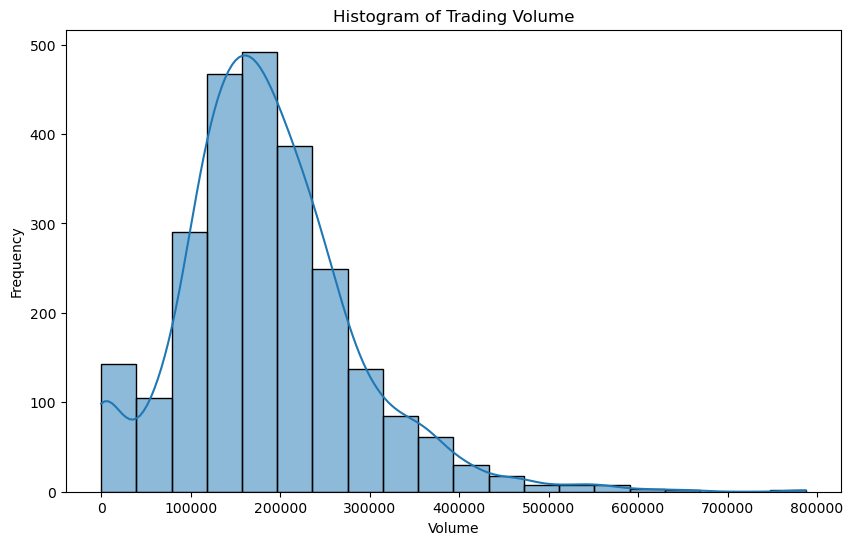

In [18]:
# Histogram of trading volume
plt.figure(figsize=(10, 6))
sns.histplot(df['Volume'], bins=20, kde=True)
plt.title('Histogram of Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()


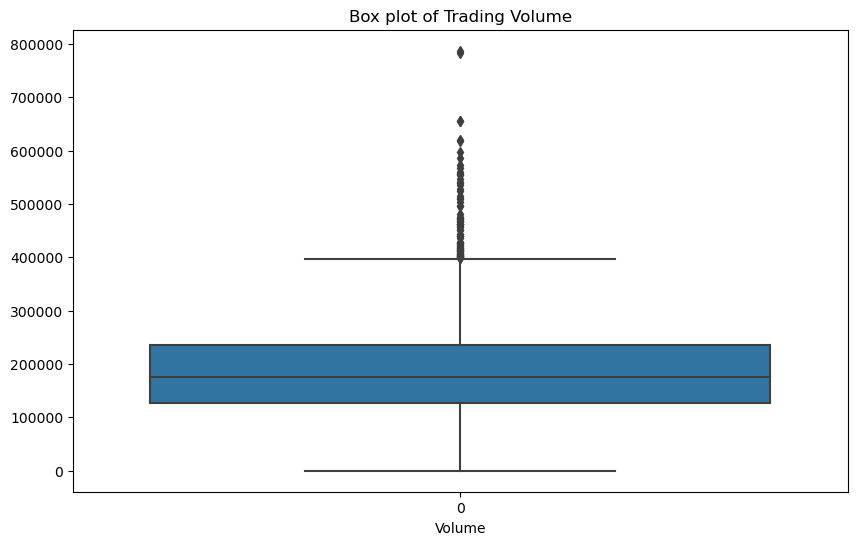

In [19]:
# Box plot of trading volume
plt.figure(figsize=(10, 6))
sns.boxplot(df['Volume'])
plt.title('Box plot of Trading Volume')
plt.xlabel('Volume')
plt.show()

    there are outliers which would be handeled later on
    

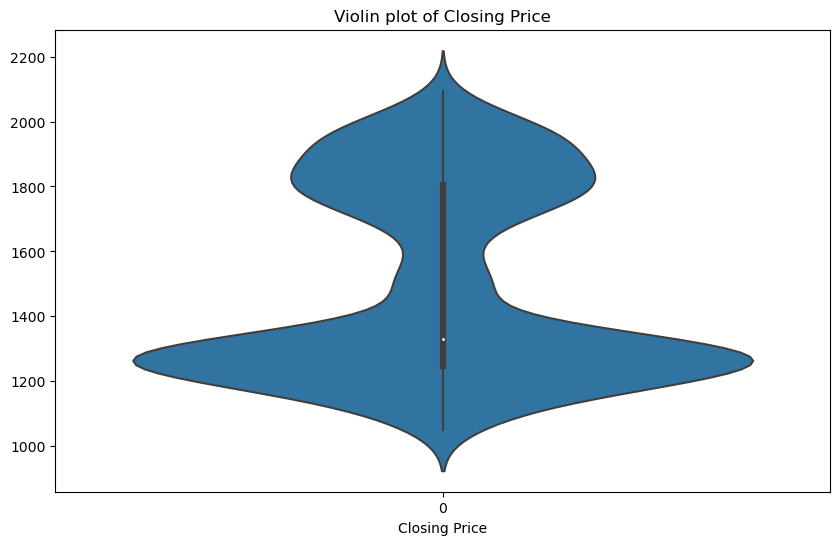

In [20]:
# Violin plot of closing price
plt.figure(figsize=(10, 6))
sns.violinplot(df['Close'])
plt.title('Violin plot of Closing Price')
plt.xlabel('Closing Price')
plt.show()

    2- Bivariate analysis

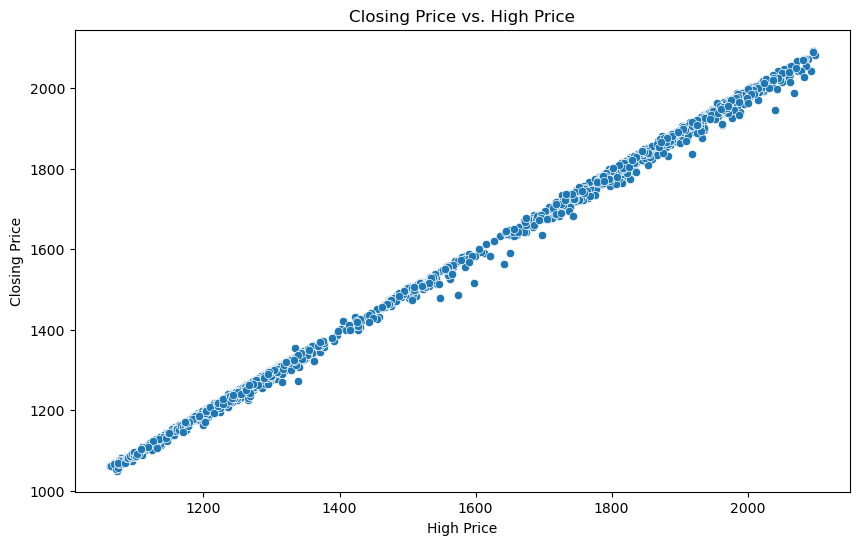

In [21]:
# Scatter plot of closing price vs. high price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='High', y='Close')
plt.title('Closing Price vs. High Price')
plt.xlabel('High Price')
plt.ylabel('Closing Price')
plt.show()


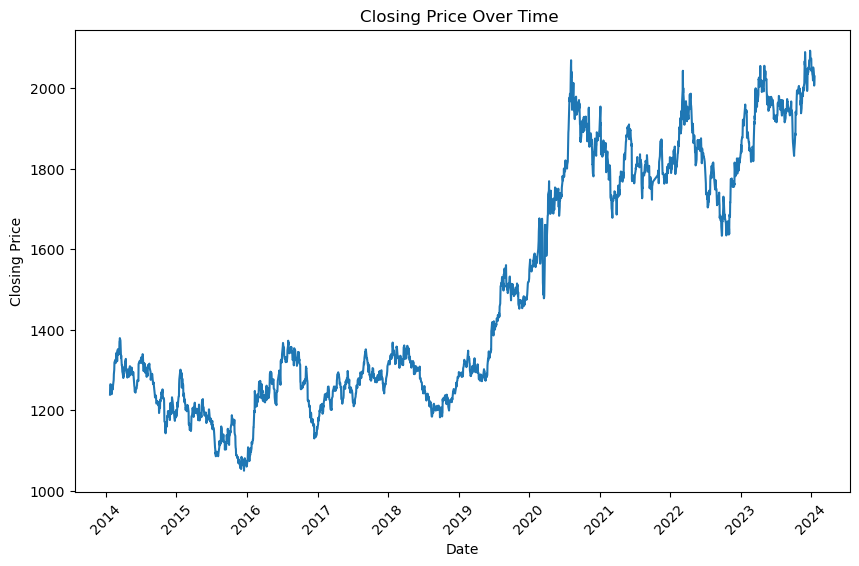

In [22]:
# Line plot of closing price over time, colored by quarter
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Close')
plt.title('Closing Price Over Time ')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.show()


    3- Multivariate analysis

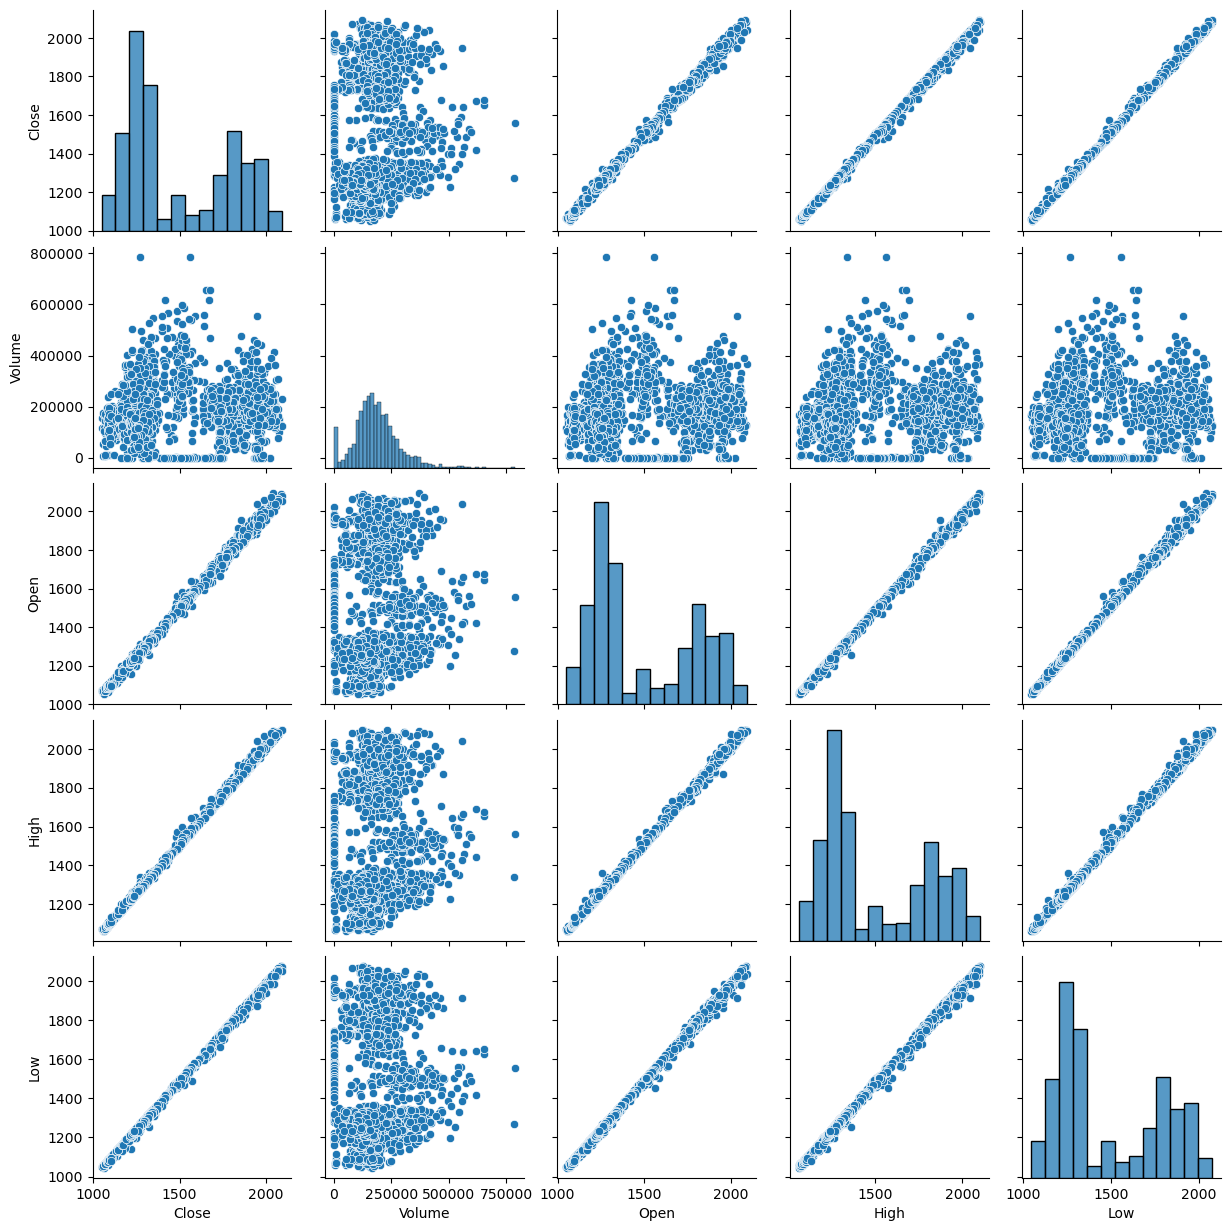

In [23]:
# Pairplot of closing price, volume, open price, high price, and low price
sns.pairplot(df[['Close', 'Volume', 'Open', 'High', 'Low']])
plt.show()

there are linear relations between features and each other

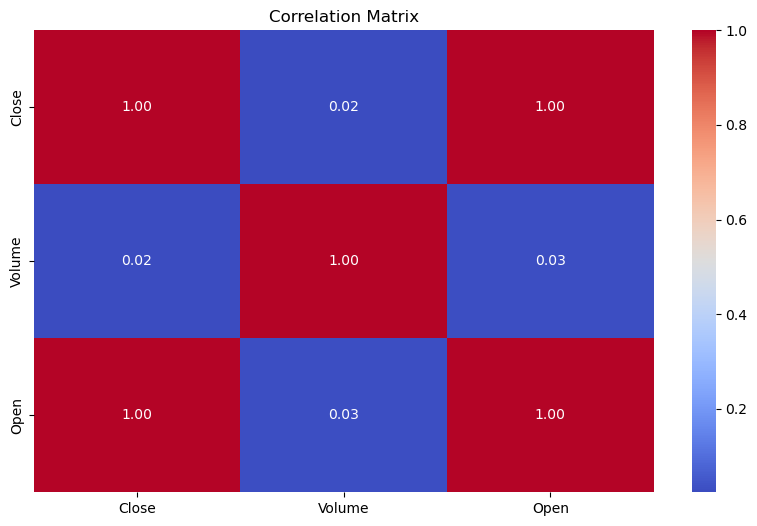

In [24]:
# Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = df[['Close', 'Volume', 'Open',]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


we could see the multicolinearity between the features, we will solve this.

<Figure size 1200x800 with 0 Axes>

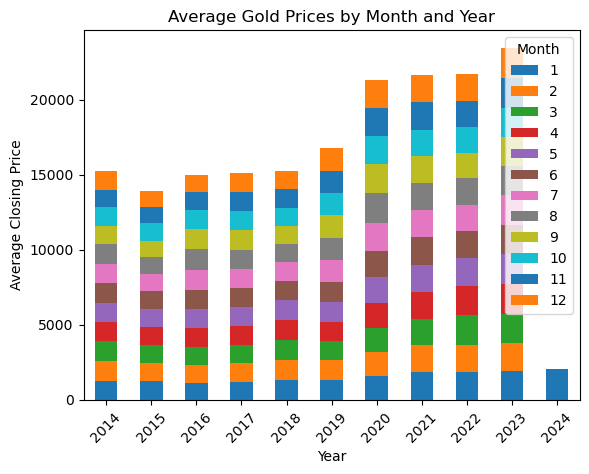

In [25]:
# Bar plot of average gold prices by month and year
plt.figure(figsize=(12, 8))
average_prices_month_year = df.groupby(['Year', 'Month'])['Close'].mean().unstack()
average_prices_month_year.plot(kind='bar', stacked=True)
plt.title('Average Gold Prices by Month and Year')
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.xticks(rotation=45)
plt.show()


Several factors contributed to the rise in gold prices from 2020:

- Economic Uncertainty: Economic instability, particularly exacerbated by the COVID-19 pandemic, led investors to seek safe-haven assets like gold.

- Geopolitical Tensions: Heightened geopolitical tensions around the world increased demand for gold as a hedge against political risks.

- Low Interest Rates: Declining interest rates reduced the opportunity cost of holding gold, making it more attractive for investors.

- Inflation Concerns: Fears of inflation prompted investors to allocate more funds into gold, which is often seen as a store of value during periods of rising prices.

# Feature Scaling

In [26]:
# Log transformation for skewed columns (Close, Volume, Open, High, Low)
skewed_columns = ['Close', 'Volume', 'Open', 'High', 'Low']
df[skewed_columns] = df[skewed_columns].apply(lambda x: np.log(x + 1))


In [28]:
# Standardize numerical features
scaler = StandardScaler()
numerical_columns = ['Close', 'Volume', 'Open', 'High', 'Low']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [29]:
df

,Date,Close,Volume,Open,High,Low,Month,Year,Day_of_week,Week_number,Quarter,Price_range,Price_change,Daily_volatility
0,2024-01-19,1.657581,0.166040,1.651658,1.654291,1.675580,1,2024,4,3,1,0.012859,0.141124,-0.433293
1,2024-01-18,1.638132,0.169690,1.605307,1.613340,1.638709,1,2024,3,3,1,-0.130679,0.933362,-0.541685
2,2024-01-17,1.599775,0.419345,1.662489,1.639757,1.630791,1,2024,2,3,1,0.953826,-1.884316,0.343636
3,2024-01-16,1.659850,0.500978,1.716798,1.706322,1.689244,1,2024,1,3,1,1.248876,-1.734837,0.563536
4,2024-01-12,1.713495,0.434422,1.666261,1.717456,1.703123,1,2024,4,2,1,1.169133,1.374325,0.520372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506,2014-01-28,-0.819011,-0.297384,-0.800185,-0.804309,-0.796993,1,2014,1,5,1,-0.449651,-0.329735,-0.250760
2507,2014-01-27,-0.766115,-0.459883,-0.739462,-0.731167,-0.780602,1,2014,0,5,1,0.682700,-0.479214,1.232807
2508,2014-01-24,-0.762069,-0.846392,-0.762048,-0.758774,-0.760594,1,2014,4,4,1,-0.258268,0.014066,-0.006979
2509,2014-01-23,-0.770165,-0.732523,-0.881460,-0.783305,-0.868077,1,2014,3,4,1,1.336593,2.046980,2.207778


# Feature Selection

In [31]:
from sklearn.model_selection import train_test_split

In [36]:
#Split Data
X = df.drop(['Close','Date','Volume','Day_of_week','Week_number','Quarter','Price_range','Price_change','Daily_volatility'], axis=1)
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Trainig

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
# 8. Model Evaluation
train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Train RMSE: 0.018741283761533348
Test RMSE: 0.019043772578751016


In [40]:
from sklearn.tree import DecisionTreeRegressor
# Instantiate the decision tree regressor
tree_regressor = DecisionTreeRegressor()

# Train the model
tree_regressor.fit(X_train, y_train)

# Evaluate the model
train_rmse_tree = np.sqrt(mean_squared_error(y_train, tree_regressor.predict(X_train)))
test_rmse_tree = np.sqrt(mean_squared_error(y_test, tree_regressor.predict(X_test)))

print("Decision Tree Train RMSE:", train_rmse_tree)
print("Decision Tree Test RMSE:", test_rmse_tree)

Decision Tree Train RMSE: 0.0
Decision Tree Test RMSE: 0.0363002697001925


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the Random Forest Regressor with default hyperparameters
rf_regressor = RandomForestRegressor()

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the training set
train_predictions = rf_regressor.predict(X_train)

# Predict on the test set
test_predictions = rf_regressor.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Train RMSE: 0.008916857385659708
Test RMSE: 0.024709431630733622


In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Define the degree of the polynomial features
degree = 2 

# Create a pipeline with PolynomialFeatures and LinearRegression
poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=degree)),
    ("lin_reg", LinearRegression())
])

# Train the polynomial regression model
poly_reg.fit(X_train, y_train)

# Predict on the training set
train_predictions = poly_reg.predict(X_train)

# Predict on the test set
test_predictions = poly_reg.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Train RMSE: 0.0183459035014367
Test RMSE: 0.019175777894234435


In [46]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Create and train the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                           colsample_bytree = 0.3, 
                           learning_rate = 0.1,
                           max_depth = 5, 
                           alpha = 10, 
                           n_estimators = 10)

xg_reg.fit(X_train, y_train)

# Make predictions
train_predictions = xg_reg.predict(X_train)
test_predictions = xg_reg.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Train RMSE: 0.43063757985206536
Test RMSE: 0.43039494248928156
